# Bike Sharing project

Problem Statement
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [996]:
###Steps which we will be following in this excercise are as follow -


## Step 1-   Reading and understanding the data.
## Step 2 -  Data Preperation
## Step 3 -  Data Visualization
## Step 4 - Splitting the data into train and test
## Step 5 - Training the model
## Step 6 - Residual analysis
## Step 7  -Train data preperation
## Step 8  - Prediction and evaluation on train and test data
## Final Verdict

## Importing all the required package and libraries

In [997]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


## Step 1-   Reading and understanding the data

In [998]:
bike_data=pd.read_csv(r'C:\Users\SONY\Downloads\day.csv')

### Analysing the file data and the fields available

In [999]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1000]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1001]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Checking for records with empty/null fields

In [1002]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [1003]:
bike_data.shape

(730, 16)

### Dropping duplicates from the data set if any

In [1004]:
bike_data.drop_duplicates(inplace=True)
bike_data.shape

(730, 16)

## Step 2 -  Data Preperation

In [1005]:
# Removing columns which are not supporting the cause of prediction
# Instant column is kind of index field and hence dropping it.
# Dropping casual and registered columns as the sum of both is cnt column
# Since atemp has same correlation as temp which we have tested in model building process using pvalue hence dropping it in advance

bike_data=bike_data.drop(['instant','casual','registered','atemp'], axis = 1)

In [1006]:
# Rename few columns to make better sense of understanding
bike_data = bike_data.rename(columns={"dteday":"date"}).rename(columns={"yr":"year"}).rename(columns={"mnth":"month"}).rename(columns={"hum":"humidity"}).rename(columns={"cnt":"count"})

In [1007]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        730 non-null    object 
 1   season      730 non-null    int64  
 2   year        730 non-null    int64  
 3   month       730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  count       730 non-null    int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 74.1+ KB


#### Encoding few variables and converting them from numerical to categorical to understand and represent better
#### For visualization only


In [1008]:
#Here we will  be encoding few variables for further analysis and rest we will be encoding for better visual.
# Also for visual we will be creating bike_data_visual dataframe. Also below encoding are for visualization
bike_data_visual = bike_data.copy()

bike_data_visual.month =bike_data.month.map({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr", 5:"May", 6:"Jun", 7:"Jul", 8:"Aug", 9:"Sep", 10:"Oct", 11:"Nov", 12:"Dec"})

bike_data_visual.season = bike_data.season.map({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"})

bike_data_visual.weathersit = bike_data.weathersit.map({1:"Clear", 2:"Mist", 3:"LightSnow", 4:"HeavyRain"})

bike_data_visual.weekday = bike_data.weekday.map({0:"Sunday", 1:"Monday", 2:"Tuesday", 3:"Wednesday", 4:"Thursday", 5:"Friday", 6:"Saturday"})

bike_data_visual.year = bike_data.year.map({0: '2018', 1: '2019'})



In [1009]:
bike_data_visual.year.unique()

array(['2018', '2019'], dtype=object)

In [1010]:
bike_data.year.unique()

array([0, 1], dtype=int64)

In [1011]:
bike_data_visual.head()

,date,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,count
0,01-01-2018,Spring,2018,Jan,0,Saturday,0,Mist,14.110847,80.5833,10.749882,985
1,02-01-2018,Spring,2018,Jan,0,Sunday,0,Mist,14.902598,69.6087,16.652113,801
2,03-01-2018,Spring,2018,Jan,0,Monday,1,Clear,8.050924,43.7273,16.636703,1349
3,04-01-2018,Spring,2018,Jan,0,Tuesday,1,Clear,8.200000,59.0435,10.739832,1562
4,05-01-2018,Spring,2018,Jan,0,Wednesday,1,Clear,9.305237,43.6957,12.522300,1600


In [1012]:
#Validating if the data is available within correct date range (i.e year 2018 and 2019)
bike_data_visual['date'].apply(lambda x: int(x.split('-')[2])).unique()

array([2018, 2019], dtype=int64)

## Step 3 -  Data Visualization

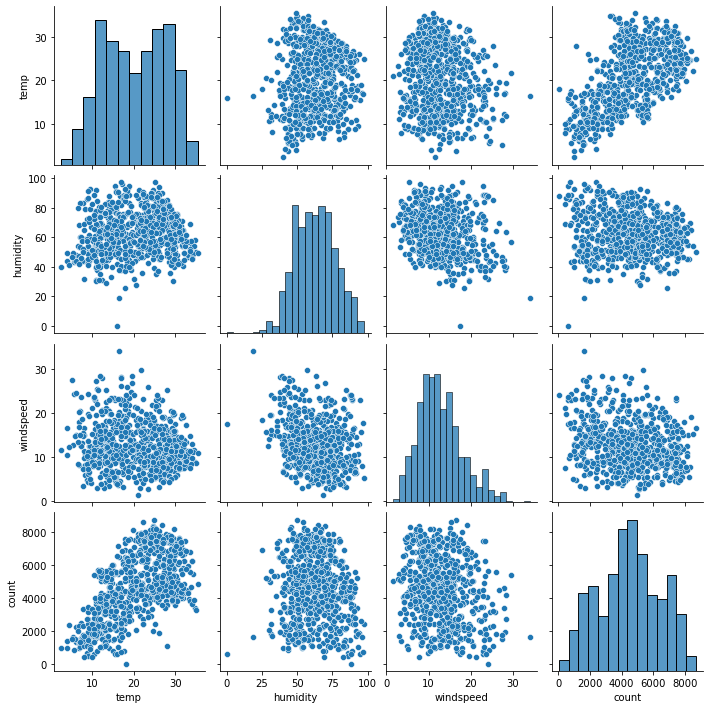

In [1013]:
#Lets visualize the numerical columns

sns.pairplot(data=bike_data_visual, vars=["temp","humidity","windspeed","count"])
plt.show()

<AxesSubplot:xlabel='temp', ylabel='count'>

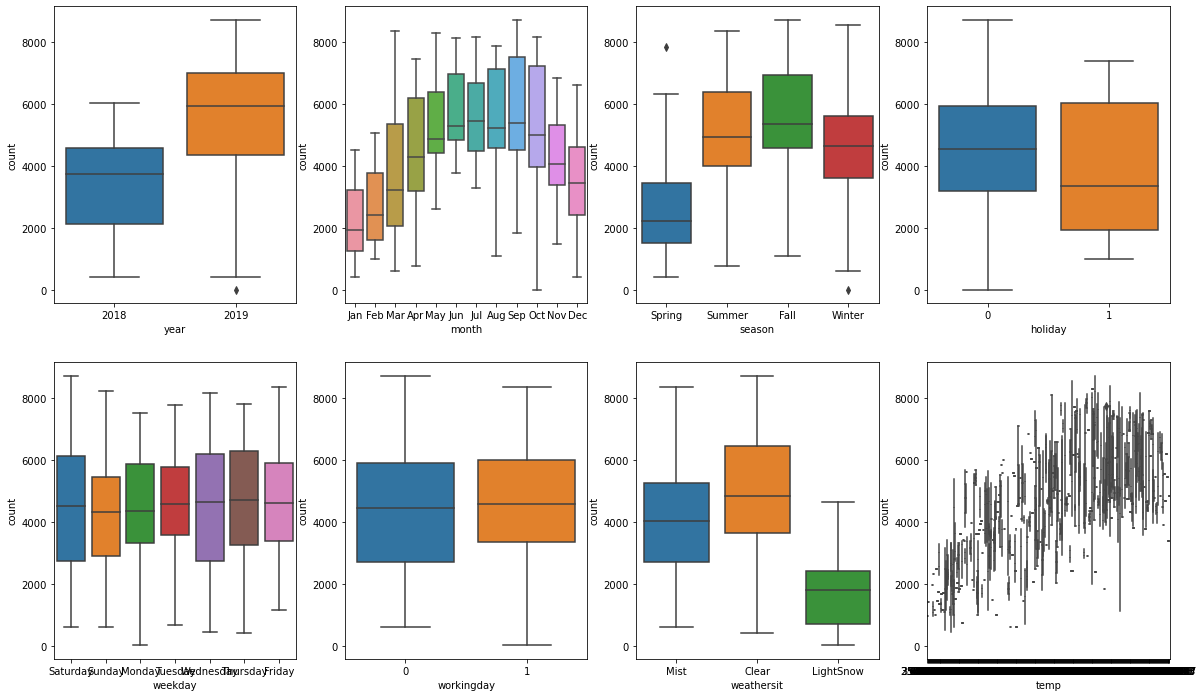

In [1014]:
plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='year',y='count',data=bike_data_visual)
plt.subplot(2,4,2)
sns.boxplot(x='month',y='count',data=bike_data_visual)
plt.subplot(2,4,3)
sns.boxplot(x='season',y='count',data=bike_data_visual)
plt.subplot(2,4,4)
sns.boxplot(x='holiday',y='count',data=bike_data_visual)
plt.subplot(2,4,5)
sns.boxplot(x='weekday',y='count',data=bike_data_visual)
plt.subplot(2,4,6)
sns.boxplot(x='workingday',y='count',data=bike_data_visual)
plt.subplot(2,4,7)
sns.boxplot(x='weathersit',y='count',data=bike_data_visual)
plt.subplot(2,4,8)
sns.boxplot(x='temp',y='count',data=bike_data_visual)

In [1015]:
#From the above plot it shows a trend in  the booking
# 1- In year 2019 - more bikes were booked as compared to year 2018.
# 2- From March the bikes booking graph increases and by start of Q4 it declines.
# 3- Summer & fall are the peak seasons for bikers, also holidays are when bookings are more.
# 4- Also weathersit has high impact on bookings - Mist & Clean weather are peak times.
# 5- Weekday/working day has less impact on the booking - there's less likely chance to figure booking pattern based on days.



### Few columns are categorical variables and can be better used/presented after using one hot encoder method

In [1016]:
raw_variables = ['year','month','season','weekday','weathersit']
#status = pd.get_dummies(bike_data_visual.month,drop_first=True)
status = pd.get_dummies(bike_data_visual[raw_variables],drop_first=True)

status.columns

Index(['year_2019', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [1017]:
status.head()

,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,month_Jul,month_Jun,month_Mar,month_May,month_Nov,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1018]:
bike_data_df = pd.concat([bike_data,status], axis=1)

bike_data_df = bike_data_df.drop(['month','season','weekday','weathersit','date','year'], axis = 1)

bike_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   holiday               730 non-null    int64  
 1   workingday            730 non-null    int64  
 2   temp                  730 non-null    float64
 3   humidity              730 non-null    float64
 4   windspeed             730 non-null    float64
 5   count                 730 non-null    int64  
 6   year_2019             730 non-null    uint8  
 7   month_Aug             730 non-null    uint8  
 8   month_Dec             730 non-null    uint8  
 9   month_Feb             730 non-null    uint8  
 10  month_Jan             730 non-null    uint8  
 11  month_Jul             730 non-null    uint8  
 12  month_Jun             730 non-null    uint8  
 13  month_Mar             730 non-null    uint8  
 14  month_May             730 non-null    uint8  
 15  month_Nov             7

## Step 4 - Splitting the data into train and test

In [1019]:
df_train, df_test = train_test_split(bike_data_df,train_size=0.7,random_state=100)

In [1020]:
print(df_train.shape)
print(df_test.shape)
print(bike_data.shape)
bike_data_df.head()

(510, 29)
(220, 29)
(730, 12)


,holiday,workingday,temp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
0,0,0,14.110847,80.5833,10.749882,985,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,14.902598,69.6087,16.652113,801,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,1,8.050924,43.7273,16.636703,1349,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1,8.200000,59.0435,10.739832,1562,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,9.305237,43.6957,12.522300,1600,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Rescaling the data using MinMax Scaler

In [1021]:
#MinMaxScaler
#1- Instantiate an object
scaler = MinMaxScaler()

#Create list of numeric variable
num_vars = ['temp','humidity','windspeed','count']

#  fit to data

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,holiday,workingday,temp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
576,0,1,0.815169,0.725633,0.264686,0.827658,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,0.482973,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0.191095,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [1022]:
df_train[num_vars].describe()

,temp,humidity,windspeed,count
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


In [1023]:
df_train.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'count',
       'year_2019', 'month_Aug', 'month_Dec', 'month_Feb', 'month_Jan',
       'month_Jul', 'month_Jun', 'month_Mar', 'month_May', 'month_Nov',
       'month_Oct', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Monday', 'weekday_Saturday', 'weekday_Sunday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

## Step 5 - Training the model

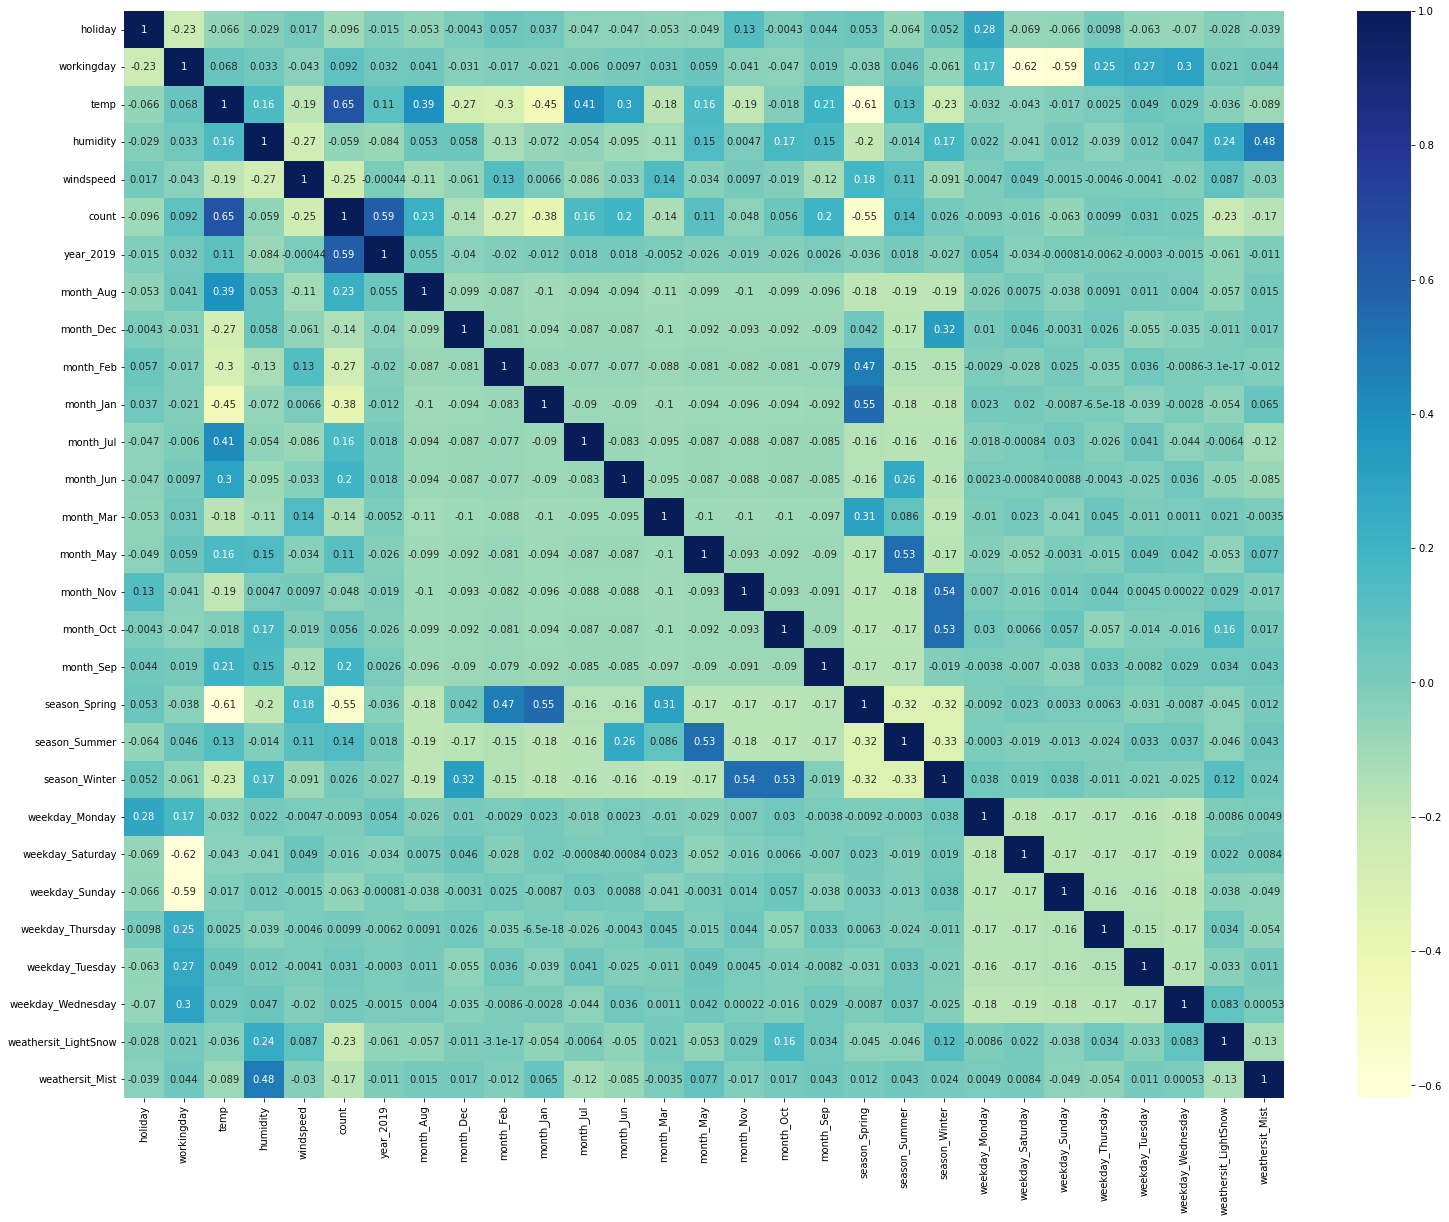

In [1024]:
#create heatmap correlation between the data set
plt.figure(figsize = (26,20))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [1025]:
#If we observer "count" variable - its correlated with temp and dtemp with same 0.65 which is same, hence dropping one should be ok
#Also months like - dec,jan,feb,march,spring,mist and mondays are negatively correlated with count.
#Few columns have high correlation with count are - august,june,july,may,sept,oct,few weekdays, summer and winter
# where august month have high correlation amoungs all of 0.23


In [1026]:
#Now lets start training the model by popping out the count and see what are the best variables in here..
#X_train,y_train
y_train = df_train.pop('count')
X_train = df_train
X_train.head()

,holiday,workingday,temp,humidity,windspeed,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
576,0,1,0.815169,0.725633,0.264686,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
482,0,0,0.395666,0.504508,0.188475,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,1,0.345824,0.751824,0.380981,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [1027]:
#Since there are many variables with possibility of high/low P values and high/low VIF
#Will use RFE method - Reccursive Filter Elimination


# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)


In [1028]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('year_2019', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 4),
 ('month_Feb', False, 5),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 13),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', False, 3),
 ('month_Oct', False, 12),
 ('month_Sep', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weekday_Monday', False, 8),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', True, 1),
 ('weekday_Thursday', False, 10),
 ('weekday_Tuesday', False, 7),
 ('weekday_Wednesday', False, 11),
 ('weathersit_LightSnow', True, 1),
 ('weathersit_Mist', True, 1)]

In [1029]:
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Jul', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

In [1030]:
X_train.columns[~rfe.support_]

Index(['month_Aug', 'month_Dec', 'month_Feb', 'month_Jan', 'month_Jun',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'weekday_Monday',
       'weekday_Thursday', 'weekday_Tuesday', 'weekday_Wednesday'],
      dtype='object')

In [1031]:
X_train_rfe = X_train[col]
X_train_rfe.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Jul', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

### Building model Attempt 1

In [1032]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

#1- Build model with all variable and adding constant variable bcz we need constant when using stats model
X_train_rfe =sm.add_constant((X_train_rfe))

#2- Creating the model first
lr = sm.OLS(y_train,X_train_rfe)


#3- Fit the model
lr_summary_01 = lr.fit()

#4 -params
#Let's see the summary of our linear model
print(lr_summary_01.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.11e-191
Time:                        15:37:32   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1995 

In [1033]:
#Calculate VIF for nre model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
12,weekday_Saturday,inf
13,weekday_Sunday,inf
9,season_Spring,5.02
3,temp,3.62
11,season_Winter,3.49
10,season_Summer,2.62
4,humidity,1.91
15,weathersit_Mist,1.57


In [1034]:
#Now since we have both P value and VIF  we need to work on deciding which value need to be factored or removed 
#we could have now 4 possible situation -
# 1- High p-value and high VIF (Can be discarded)
# 2 - Low p-value and low VIF  (should be considered)
# 3 - High - Low
#   - High P-value and Low VIF    (remove these first)
#    - Low P-Value and High VIF   (remove these after the first once are removed))
#Below is how we need to work on this

In [1035]:
#Feature name - "holiday" has the heighest P-value hence we will skip that and observe the VIF score for all other fields
# to see if there's any impact on those due to feature - "holiday"
# Drop 'holiday' as we have created the dummies for it
X_train_new = X_train_rfe.drop(['holiday'], axis=1)
X_train_new.columns




Index(['const', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Jul', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Saturday', 'weekday_Sunday',
       'weathersit_LightSnow', 'weathersit_Mist'],
      dtype='object')

### Building model Attempt 2

In [1036]:
#1- Build model with all variable and adding constant variable bcz we need constant when using stats model
X_train_rfe =sm.add_constant((X_train_new))

#2- Creating the model first
lr = sm.OLS(y_train,X_train_rfe)


#3- Fit the model
lr_summary_02 = lr.fit()

#4 -params
#Let's see the summary of our linear model
print(lr_summary_02.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          2.11e-191
Time:                        15:37:33   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1811 

In [1037]:
#Calculate VIF for nre model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,114.08
1,workingday,9.07
11,weekday_Saturday,6.06
12,weekday_Sunday,5.74
8,season_Spring,5.02
2,temp,3.62
10,season_Winter,3.49
9,season_Summer,2.62
3,humidity,1.91
14,weathersit_Mist,1.57


In [1038]:
# Drop 'month_May' as we have created the dummies for it
# Drop 'weekday_Sunday' and 'weekday_Saturday' has high vif value and it remains unchanged even after dropping high pvalue features
X_train_new = X_train_rfe.drop(['weekday_Sunday'], axis=1)#.drop(['workingday'], axis=1).drop(['weekday_Saturday'], axis=1)
X_train_new.columns

Index(['const', 'workingday', 'temp', 'humidity', 'windspeed', 'year_2019',
       'month_Jul', 'month_Sep', 'season_Spring', 'season_Summer',
       'season_Winter', 'weekday_Saturday', 'weathersit_LightSnow',
       'weathersit_Mist'],
      dtype='object')

### Building model Attempt 3

In [1039]:
#1- Build model with all variable and adding constant variable bcz we need constant when using stats model
X_train_rfe =sm.add_constant((X_train_new))

#2- Creating the model first
lr = sm.OLS(y_train,X_train_rfe)


#3- Fit the model
lr_summary_03 = lr.fit()

#4 -params
#Let's see the summary of our linear model
print(lr_summary_03.summary())

                            OLS Regression Results                            
Dep. Variable:                  count   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Wed, 13 Jul 2022   Prob (F-statistic):          1.54e-191
Time:                        15:37:33   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2307 

In [1040]:
#Calculate VIF for nre model

vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,81.14
8,season_Spring,5.02
2,temp,3.62
10,season_Winter,3.48
9,season_Summer,2.62
3,humidity,1.91
1,workingday,1.65
11,weekday_Saturday,1.64
13,weathersit_Mist,1.57
6,month_Jul,1.49


## Step 6 - Residual analysis

In [1041]:
y_train_pred = lr_summary_03.predict(X_train_rfe)


Text(0.5, 0, 'Errors')

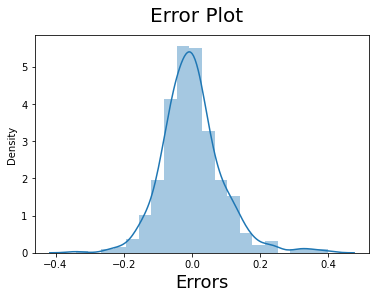

In [1042]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train_pred - y_train), bins = 20)
fig.suptitle('Error Plot', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

In [1043]:
# As per above plot we can confrim that error plot follows a normal distribution
# We can confirm distribution of error is around 0.
# As per model the R-squared value is 0.846 and adjusted R-squared value is 0.841



## Step 7  -Train data preperation


In [1044]:
#Create list of numeric variable
num_vars = ['temp','humidity','windspeed','count']

#  fit to data

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,holiday,workingday,temp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
184,1,0,0.831783,0.657364,0.084219,0.692706,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.901354,0.610133,0.153728,0.712034,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,1,0.511964,0.837699,0.334206,0.303382,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0.547400,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.817246,0.314298,0.537414,0.569029,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [1045]:
df_test.describe()

,holiday,workingday,temp,humidity,windspeed,count,year_2019,month_Aug,month_Dec,month_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.481818,0.059091,0.086364,0.100000,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.500809,0.236333,0.281541,0.300684,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1046]:
#X_test,y_test
y_test = df_test.pop('count')
X_test = df_test
X_test.head()

,holiday,workingday,temp,humidity,windspeed,year_2019,month_Aug,month_Dec,month_Feb,month_Jan,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
184,1,0,0.831783,0.657364,0.084219,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,0,1,0.901354,0.610133,0.153728,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,1,0.511964,0.837699,0.334206,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,1,0.881625,0.437098,0.339570,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,1,0.817246,0.314298,0.537414,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [1047]:
#add coefficient
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,holiday,workingday,temp,humidity,windspeed,year_2019,month_Aug,month_Dec,month_Feb,...,season_Summer,season_Winter,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow,weathersit_Mist
184,1.0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1.0,0,1,0.901354,0.610133,0.153728,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,1.0,0,1,0.511964,0.837699,0.334206,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,1.0,0,1,0.881625,0.437098,0.339570,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,1.0,0,1,0.817246,0.314298,0.537414,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [1048]:
X_test_sm = X_test_sm[['const','workingday','temp','humidity','windspeed','year_2019','month_Jul','month_Sep','season_Spring','season_Summer','season_Winter','weekday_Saturday','weathersit_LightSnow','weathersit_Mist']]
X_test_sm.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   const                 220 non-null    float64
 1   workingday            220 non-null    int64  
 2   temp                  220 non-null    float64
 3   humidity              220 non-null    float64
 4   windspeed             220 non-null    float64
 5   year_2019             220 non-null    uint8  
 6   month_Jul             220 non-null    uint8  
 7   month_Sep             220 non-null    uint8  
 8   season_Spring         220 non-null    uint8  
 9   season_Summer         220 non-null    uint8  
 10  season_Winter         220 non-null    uint8  
 11  weekday_Saturday      220 non-null    uint8  
 12  weathersit_LightSnow  220 non-null    uint8  
 13  weathersit_Mist       220 non-null    uint8  
dtypes: float64(4), int64(1), uint8(9)
memory usage: 12.2 KB


In [1049]:
#Predict
y_test_pred = lr_summary_03.predict(X_test_sm)

In [1050]:
# Evaluate
r2_score(y_true=y_test,y_pred=y_test_pred)

0.8177065630550072

### R2 square on on test data is 0.817 and R2 square on training data set is 0.846 which is very close.



## Step 8 - Prediction and evaluation on train and test data

Text(0.5, 0, 'y_test_pred')

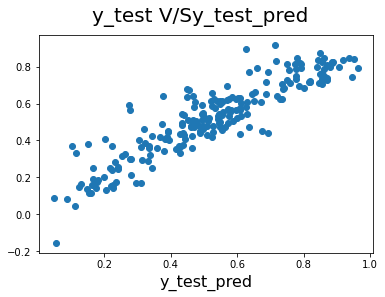

In [1051]:
# plotting y_test and y_test_predto understand the spread
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test V/Sy_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=16)
plt.xlabel('y_test_pred', fontsize=16)


In [1053]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8177065630550072

## Final Vedict



Below is the list of features which plays important role for bikes booking -

- workingday
- temp
- humidity
- windspeed
- year_2019
- month_Jul
- month_Sep
- season_Spring
- season_Summer
- season_Winter
- weekday_Saturday
- weathersit_LightSnow
- weathersit_Mist

Also based on the model prediction we can form an equation with the above mentioned features -
- count = 0.230660 + workingday * 0.051820 + temp * 0.527801 + humidity * (-0.159435) + windspeed * (-0.181454) + year_2019 * 0.229985 + month_Jul * (-0.053474) + month_Sep * 0.079917 + season_Spring ( -0.056614) + season_Summer * 0.054071 + season_Winter * 0.098254 + weekday_Saturday * 0.061937 + weathersit_LightSnow * (-0.244219) + weathersit_Mist * (-0.056078) 

